# Static axes

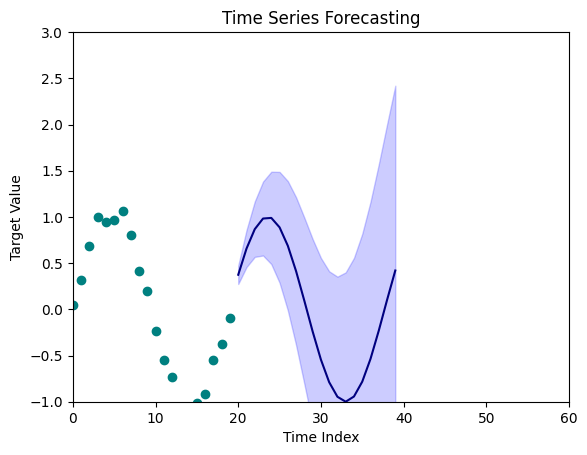

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Données simulées
np.random.seed(42)
x = np.arange(20)
y = np.sin(x / 3) + np.random.normal(0, 0.1, len(x))

# Préparation des prévisions futures
future_x = np.arange(20, 40)
future_mean = np.sin(future_x / 3)
future_std = 0.1 + 0.1 * (future_x - 20)

# Création de la figure
fig, ax = plt.subplots()
ax.set_xlim(0, 60)
ax.set_ylim(-1, 3)
ax.set_title("Time Series Forecasting")
ax.set_xlabel("Time Index")
ax.set_ylabel("Target Value")

# Scatter points du passé
ax.scatter(x, y, color="teal")

# Initialisation des éléments du futur
(line,) = ax.plot([], [], color="navy")
fill = None


# Fonction d’initialisation
def init():
    line.set_data([], [])
    return (line,)


# Fonction d’animation
def animate(i):
    global fill
    if fill:
        fill.remove()
    x_data = future_x[:i]
    y_mean = future_mean[:i]
    y_std = future_std[:i]

    line.set_data(x_data, y_mean)
    fill = ax.fill_between(
        x_data, y_mean - y_std, y_mean + y_std, color="blue", alpha=0.2
    )

    # new_xmax = 25 + i * 1.5
    # new_ymax = max(1.5, np.max(y_mean + y_std) + 0.2)
    # ax.set_xlim(0, new_xmax)
    # ax.set_ylim(-1, new_ymax)

    return line, fill


# Création de l’animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(future_x) + 1, interval=200, blit=False
)

# Sauvegarde en GIF
ani.save("forecast.gif", writer="pillow", fps=5)
plt.show()

# Moving axes

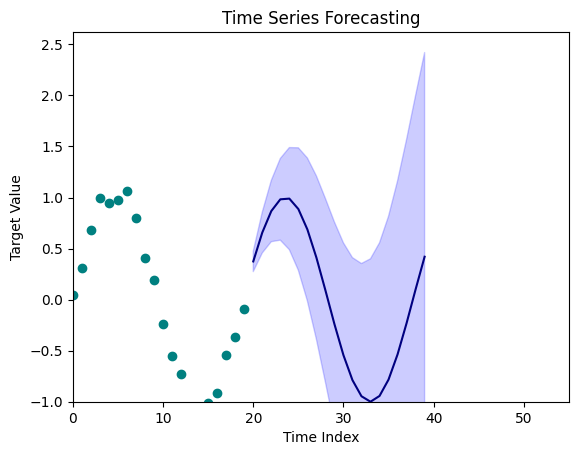

In [2]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
x = np.arange(20)
y = np.sin(x / 3) + np.random.normal(0, 0.1, len(x))

future_x = np.arange(20, 40)
future_mean = np.sin(future_x / 3)
future_std = 0.1 + 0.1 * (future_x - 20)

fig, ax = plt.subplots()
ax.set_title("Time Series Forecasting")
ax.set_xlabel("Time Index")
ax.set_ylabel("Target Value")
ax.scatter(x, y, color="teal")

(line,) = ax.plot([], [], color="navy")
fill = None

x_min, x_max = 0, 25
y_min, y_max = -1, 1.5


def init():
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    line.set_data([], [])
    return (line,)


def animate(i):
    global fill
    if fill:
        fill.remove()

    x_data = future_x[:i]
    y_mean = future_mean[:i]
    y_std = future_std[:i]

    line.set_data(x_data, y_mean)

    # Ajoute la zone d'incertitude uniquement si on a des points
    if len(x_data) > 0:
        fill = ax.fill_between(
            x_data, y_mean - y_std, y_mean + y_std, color="blue", alpha=0.2
        )
        new_ymax = max(1.5, np.max(y_mean + y_std) + 0.2)
    else:
        new_ymax = 1.5

    # Mise à jour progressive des axes
    new_xmax = 25 + i * 1.5
    ax.set_xlim(0, new_xmax)
    ax.set_ylim(-1, new_ymax)

    return line, fill if fill else line


ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(future_x) + 1, interval=200, blit=False
)

ani.save("forecast_dynamic_axes.gif", writer="pillow", fps=5)
plt.show()

# Fluid zoom

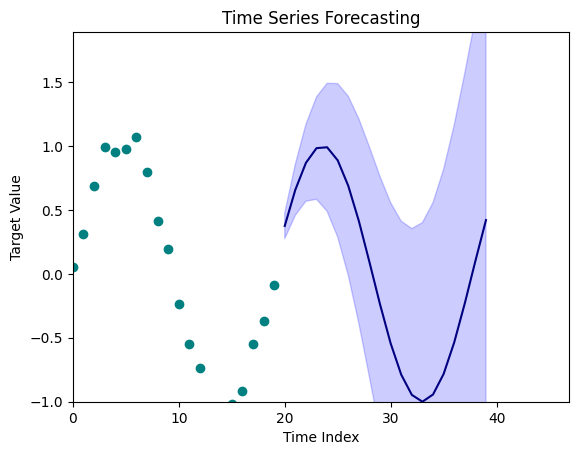

In [4]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Données simulées
np.random.seed(42)
x = np.arange(20)
y = np.sin(x / 3) + np.random.normal(0, 0.1, len(x))

future_x = np.arange(20, 40)
future_mean = np.sin(future_x / 3)
future_std = 0.1 + 0.1 * (future_x - 20)

# Création de la figure
fig, ax = plt.subplots()
ax.set_title("Time Series Forecasting")
ax.set_xlabel("Time Index")
ax.set_ylabel("Target Value")
ax.scatter(x, y, color="teal")

(line,) = ax.plot([], [], color="navy")
fill = None

# Limites initiales
ax.set_xlim(0, 25)
ax.set_ylim(-1, 1.5)


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    global fill
    if fill:
        fill.remove()

    x_data = future_x[:i]
    y_mean = future_mean[:i]
    y_std = future_std[:i]

    line.set_data(x_data, y_mean)

    if len(x_data) > 0:
        fill = ax.fill_between(
            x_data, y_mean - y_std, y_mean + y_std, color="blue", alpha=0.2
        )
        target_xmax = 25 + i * 1.5
        target_ymax = max(1.5, np.max(y_mean + y_std) + 0.2)
    else:
        target_xmax = 25
        target_ymax = 1.5

    # --- Zoom fluide (effet easing) ---
    current_xlim = ax.get_xlim()
    current_ylim = ax.get_ylim()
    smooth_xmax = current_xlim[1] + 0.15 * (target_xmax - current_xlim[1])
    smooth_ymax = current_ylim[1] + 0.15 * (target_ymax - current_ylim[1])
    ax.set_xlim(0, smooth_xmax)
    ax.set_ylim(-1, smooth_ymax)
    # -----------------------------------

    return line, fill if fill else line


ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(future_x) + 1, interval=200, blit=False
)

ani.save("forecast_zoom_smooth.gif", writer="pillow", fps=15)
plt.show()